<a href="https://colab.research.google.com/github/varun-chourasia/Machine-Learning-/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

Linear regression is a supervised machine learning algorithm that models the linear relationship between a dependent variable and one or more independent variables to predict continuous numerical values. It works by finding a straight line that best fits the data points on a scatter plot, with the goal of minimizing the distance between the line and the points. This algorithm is used for tasks like predicting housing prices based on size or forecasting sales revenue from historical data.  

### How it works
`Relationship modeling:` Linear regression establishes a mathematical relationship between variables to understand how they influence each other.

`Finding the best-fit line:` The algorithm identifies the "best fit" line that minimizes the error between the predicted values and the actual data points.

`Prediction:` Once the line is established, it can be used to predict the value of the dependent variable for new, unseen data points based on their independent variable values.

_Formula :_

          y = w*x + b

In [78]:
import numpy as np

#Data
X= np.array([1,2,3,4,5])
Y= np.array([3,5,7,9,11])

#Initialize
w = 0.5 #slope
b = 0.5 #intercept
lr = 0.01  #learning rate
epochs = 30  #keep it small so we can watch each update

#Training Loop
for i in range(epochs):
  #step 1 :- Forward pass [predictions]
  Y_pred = w * X + b

  #step 2 :- compute loss
  loss= np.mean((Y - Y_pred)**2)

  #step 3 :- Gradiant
  dw = -(2/len(X)) * np.sum(X * (Y - Y_pred))
  db = -(2/len(X)) * np.sum(Y - Y_pred)

  #step 4 :- Update
  w = w - lr * dw
  b = b - lr * db

  #print progress
  print(f"epoch {i +1} : w = {w: .3f}, b = {b: .3f}, loss = {loss: .4f}")

def predict(X,w,b):
  return w*X+b


epoch 1 : w =  0.860, b =  0.600, loss =  29.5000
epoch 2 : w =  1.135, b =  0.676, loss =  17.1916
epoch 3 : w =  1.345, b =  0.735, loss =  10.0189
epoch 4 : w =  1.505, b =  0.779, loss =  5.8390
epoch 5 : w =  1.627, b =  0.814, loss =  3.4031
epoch 6 : w =  1.720, b =  0.840, loss =  1.9836
epoch 7 : w =  1.791, b =  0.860, loss =  1.1564
epoch 8 : w =  1.846, b =  0.875, loss =  0.6743
epoch 9 : w =  1.887, b =  0.887, loss =  0.3934
epoch 10 : w =  1.919, b =  0.896, loss =  0.2297
epoch 11 : w =  1.943, b =  0.903, loss =  0.1343
epoch 12 : w =  1.961, b =  0.908, loss =  0.0787
epoch 13 : w =  1.975, b =  0.912, loss =  0.0463
epoch 14 : w =  1.986, b =  0.916, loss =  0.0274
epoch 15 : w =  1.994, b =  0.918, loss =  0.0164
epoch 16 : w =  2.000, b =  0.920, loss =  0.0100
epoch 17 : w =  2.005, b =  0.922, loss =  0.0062
epoch 18 : w =  2.009, b =  0.923, loss =  0.0040
epoch 19 : w =  2.011, b =  0.924, loss =  0.0028
epoch 20 : w =  2.013, b =  0.925, loss =  0.0020
epoch 

In [79]:
X_test = np.array([5,6,7])

Y_pred_test = predict(X_test,w,b)
print("predicted value :",Y_pred_test)

predicted value : [11.02485989 13.04404094 15.06322199]


 Plot the Model

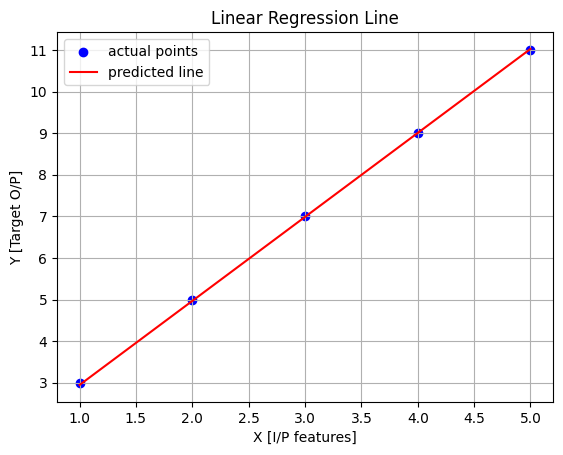

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X, Y, color='blue', label="actual points")
plt.plot(X, Y_pred, color='red', label='predicted line')

plt.xlabel("X [I/P features]")
plt.ylabel("Y [Target O/P]")
plt.title("Linear Regression Line")
plt.legend()
plt.grid(True)
plt.show()

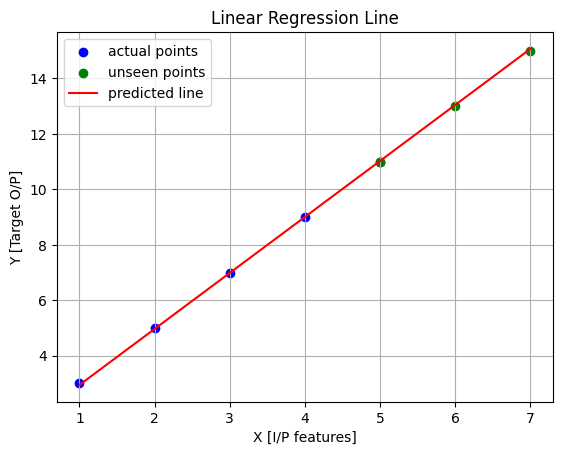

In [81]:
Y_test = np.array([11,13,15])

plt.scatter(X, Y, color='blue', label="actual points")
plt.plot(X, Y_pred, color='red')

plt.scatter(X_test, Y_test, color='green', label="unseen points")
plt.plot(X_test, Y_pred_test, color='red', label='predicted line')

plt.xlabel("X [I/P features]")
plt.ylabel("Y [Target O/P]")
plt.title("Linear Regression Line")
plt.legend()
plt.grid(True)
plt.show()

Computer the Error of the models


In [82]:
from sklearn.metrics import mean_squared_error, r2_score

#for Y known data
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0009263027103892629
R-squared: 0.9998842121612014


In [83]:
# for Y_test unknonw data
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)

print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Squared Error: 0.00218487951386041
R-squared: 0.9991806701823024


### Custom Implemented Linear Regression:-

In [84]:
from sklearn.model_selection import train_test_split
import pandas as pd

class MyLinearRegression:
  def __init__(self,lr =0.01,epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.w = None
    self.b = 0
    self.loss_history = []

  def fit(self,X,y):
    # if X is 1D, reshape it to 2D
    if X.ndim ==1:
      X = X.reshape(-1,1)

    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for i in range(self.epochs):
      # forward pass
      y_pred = np.dot(X,self.w) + self.b

      # compute gradients
      dw = -(2/n_samples) * np.dot(X.T, (y - y_pred))
      db = -(2/n_samples) * np.sum(y - y_pred)

      # update weights and bias
      self.w -= self.lr * dw
      self.b -= self.lr * db

      # print loss occasionally
      if i % 100 == 0:
        loss = np.mean((y - y_pred)**2)
        print(f"Epochs {i}: Loss={loss:.4f}")

      self.loss_history.append(loss)
    return self

  def predict(self, X):
    if X.ndim ==1:
      X = X.reshape(-1,1)

    return np.dot(X,self.w) + self.b



### Problem Question

1. Student Performance Prediction

`Problem Statement:` Predict a student’s final CGPA based on internal academic indicators such as attendance, assignment scores, and midterm marks.

`Goal:` Identify students likely to underperform so teachers can intervene early.

In [85]:
# Create Dataset
n =100
attendance = np.random.randint(60,100, n)
assignment = np.random.randint(50,100, n)
midterm = np.random.randint(40,95, n)

cgpa = 0.03*attendance + 0.04*assignment + 0.05*midterm + np.random.normal(0,0.3,n) +2

X = np.column_stack((attendance, assignment, midterm))
y = cgpa

# train-test split
split = int(0.8*n)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# train your model
# model = MyLinearRegression(lr=0.00001, epochs=1000)
model = MyLinearRegression(lr=0.00001, epochs=2000) # epochs =2000+ for Probably stabilizes ~same (good).
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate
mse = np.mean((y_test - y_pred)**2)
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred)**2)
r2 = 1 - (ss_res / ss_total)

print("\nFinal Results:")
print(f"MSE: {mse:.4f}")
print(f"R² : {r2:.4f}")
print("Weights:", model.w)
print("Bias:", model.b)

Epochs 0: Loss=116.5042
Epochs 100: Loss=0.1294
Epochs 200: Loss=0.1241
Epochs 300: Loss=0.1215
Epochs 400: Loss=0.1202
Epochs 500: Loss=0.1196
Epochs 600: Loss=0.1192
Epochs 700: Loss=0.1190
Epochs 800: Loss=0.1189
Epochs 900: Loss=0.1189
Epochs 1000: Loss=0.1188
Epochs 1100: Loss=0.1188
Epochs 1200: Loss=0.1188
Epochs 1300: Loss=0.1188
Epochs 1400: Loss=0.1188
Epochs 1500: Loss=0.1188
Epochs 1600: Loss=0.1188
Epochs 1700: Loss=0.1188
Epochs 1800: Loss=0.1188
Epochs 1900: Loss=0.1188

Final Results:
MSE: 0.2523
R² : 0.8658
Weights: [0.04428254 0.04842736 0.05457707]
Bias: 0.0014013891045806474


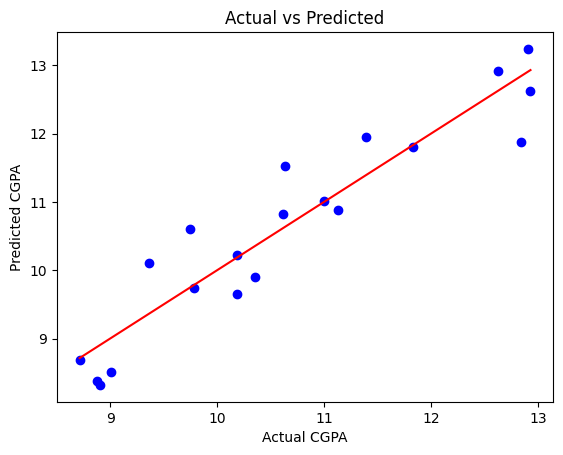

In [86]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs Predicted')
plt.show()


2. Car Price Estimation

`Problem Statement:` Predict a car’s market price based on measurable specifications like age, mileage, and engine power.

`Goal:` Help used-car dealers estimate a fair resale value.

In [87]:
# 1️⃣ Generate data
np.random.seed(2)
n = 120
age = np.random.randint(1, 10, n)
mileage = np.random.randint(5000, 150000, n)
power = np.random.randint(60, 250, n)
price = 20 - (0.5*age) - (0.00005*mileage) + (0.08*power) + np.random.normal(0, 0.5, n)

df2 = pd.DataFrame({
    'Age': age,
    'Mileage': mileage,
    'Power': power,
    'Price': np.round(price, 2)
})

X = df2[['Age','Mileage','Power']]
y = df2['Price']

# 2️⃣ Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Normalize (fit only on train, apply to both)
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std   # same mean/std

# 4️⃣ Train model
model = MyLinearRegression(lr=0.001, epochs=5000)
model.fit(X_train_scaled, y_train)

# 5️⃣ Predict & evaluate
y_pred = model.predict(X_test_scaled)
print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# 6️⃣ Unscale coefficients back to real-world units
real_w = model.w / X_std
real_b = model.b - np.sum(real_w * X_mean)

print("\nReal-world coefficients:")
print("Weights:", real_w)
print("Bias:", real_b)


Epochs 0: Loss=687.3085
Epochs 100: Loss=461.2259
Epochs 200: Loss=309.5538
Epochs 300: Loss=207.7957
Epochs 400: Loss=139.5215
Epochs 500: Loss=93.7104
Epochs 600: Loss=62.9699
Epochs 700: Loss=42.3409
Epochs 800: Loss=28.4966
Epochs 900: Loss=19.2048
Epochs 1000: Loss=12.9681
Epochs 1100: Loss=8.7816
Epochs 1200: Loss=5.9713
Epochs 1300: Loss=4.0845
Epochs 1400: Loss=2.8177
Epochs 1500: Loss=1.9671
Epochs 1600: Loss=1.3959
Epochs 1700: Loss=1.0123
Epochs 1800: Loss=0.7546
Epochs 1900: Loss=0.5816
Epochs 2000: Loss=0.4653
Epochs 2100: Loss=0.3872
Epochs 2200: Loss=0.3347
Epochs 2300: Loss=0.2994
Epochs 2400: Loss=0.2757
Epochs 2500: Loss=0.2598
Epochs 2600: Loss=0.2491
Epochs 2700: Loss=0.2419
Epochs 2800: Loss=0.2370
Epochs 2900: Loss=0.2338
Epochs 3000: Loss=0.2316
Epochs 3100: Loss=0.2301
Epochs 3200: Loss=0.2291
Epochs 3300: Loss=0.2285
Epochs 3400: Loss=0.2280
Epochs 3500: Loss=0.2277
Epochs 3600: Loss=0.2275
Epochs 3700: Loss=0.2274
Epochs 3800: Loss=0.2273
Epochs 3900: Loss=0.2

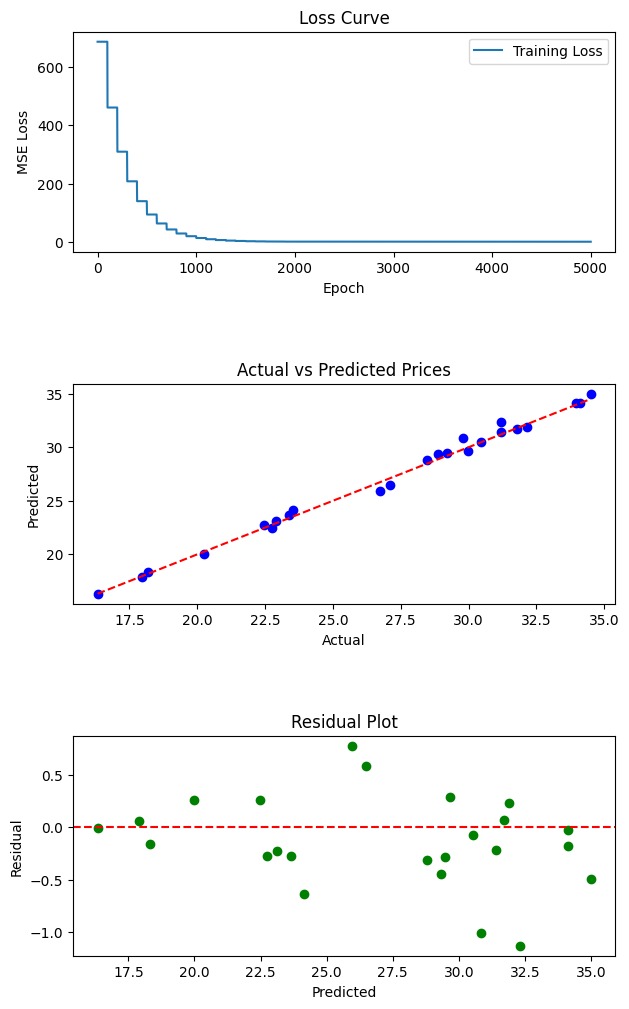

In [88]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))
fig.subplots_adjust(hspace=0.6)  # <-- gap between plots

# Loss Curve
axes[0].plot(model.loss_history, label='Training Loss')
axes[0].set_title("Loss Curve")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MSE Loss")
axes[0].legend()

# Actual vs Predicted
axes[1].scatter(y_test, y_pred, color='blue')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Actual vs Predicted Prices")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")

# Residuals
residuals = y_test - y_pred
axes[2].scatter(y_pred, residuals, color='green')
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title("Residual Plot")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Residual")

plt.show()


3. Fitness Tracker — Calories Burn Prediction
`Problem Statement:` Estimate the number of calories burned in a day based on daily steps, workout time, and age.

`Goal:` Help users understand their activity–calorie relationship and plan workouts effectively.

In [89]:
from sklearn.preprocessing import StandardScaler

np.random.seed(3)
n = 150

steps = np.random.randint(2000, 20000, n)
workout_time = np.random.randint(10, 120, n)
age = np.random.randint(18, 60, n)

calories = 0.03*steps + 5*workout_time - 3*age + np.random.normal(0, 100, n) + 500

df3 = pd.DataFrame({
    'Steps': steps,
    'WorkoutTime': workout_time,
    'Age': age,
    'CaloriesBurned': np.round(calories,2)
})

X = df3[['Steps','WorkoutTime','Age']]
y = df3['CaloriesBurned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

model = MyLinearRegression(lr = 0.001, epochs=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# 6️⃣ Unscale coefficients back to real-world units
real_w = model.w / X_std
real_b = model.b - np.sum(real_w * X_mean)

print("\nReal-world coefficients:")
print("Weights:", real_w)
print("Bias:", real_b)



Epochs 0: Loss=1139997.4494
Epochs 100: Loss=764522.8413
Epochs 200: Loss=513849.7560
Epochs 300: Loss=346446.1785
Epochs 400: Loss=234620.3811
Epochs 500: Loss=159901.4702
Epochs 600: Loss=109964.5244
Epochs 700: Loss=76582.8132
Epochs 800: Loss=54263.3778
Epochs 900: Loss=39337.5248
Epochs 1000: Loss=29354.3126
Epochs 1100: Loss=22675.9353
Epochs 1200: Loss=18207.7020
Epochs 1300: Loss=15217.7783
Epochs 1400: Loss=13216.8141
Epochs 1500: Loss=11877.5405
Epochs 1600: Loss=10981.0487
Epochs 1700: Loss=10380.8892
Epochs 1800: Loss=9979.0729
Epochs 1900: Loss=9710.0275

MSE: 18856.66219742141
R²: 0.7557088065725969

Real-world coefficients:
Weights: Age        53.268837
Mileage     0.003497
Power      -0.679552
dtype: float64
Bias: 575.8480289714894
